TODOS:
* a.	Check total number of entries and column types
1.     101
1.     11 COLUMN TYPES
* b.	Check any null (i.e. missing) values
* c.	Check duplicate entries
* d.	Plot distribution of numeric data (univariate and pairwise joint distribution)
* e.	Plot count distribution of categorical data
* f.	Analyze time series of numeric data by daily, monthly and yearly frequencies
* g.	Check with your mentor on additional steps to conduct (see below)

STEP 0: Imports and Reading in Data


In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/mental-health-conversational-data/intents.json
/kaggle/input/student-mental-health/Student Mental health.csv


In [2]:
data = pd.read_csv("/kaggle/input/student-mental-health/Student Mental health.csv")

STEP 1: Data Understanding
* Dataframe shape
* head and tail
* dtypes
* describes

In [3]:
data.head(3)

,Timestamp,Choose your gender,Age,What is your course?,Your current year of Study,What is your CGPA?,Marital status,Do you have Depression?,Do you have Anxiety?,Do you have Panic attack?,Did you seek any specialist for a treatment?
0,8/7/2020 12:02,Female,18.0,Engineering,year 1,3.00 - 3.49,No,Yes,No,Yes,No
1,8/7/2020 12:04,Male,21.0,Islamic education,year 2,3.00 - 3.49,No,No,Yes,No,No
2,8/7/2020 12:05,Male,19.0,BIT,Year 1,3.00 - 3.49,No,Yes,Yes,Yes,No


In [4]:
data.tail(3)

,Timestamp,Choose your gender,Age,What is your course?,Your current year of Study,What is your CGPA?,Marital status,Do you have Depression?,Do you have Anxiety?,Do you have Panic attack?,Did you seek any specialist for a treatment?
98,13/07/2020 21:22:56,Female,19.0,Nursing,Year 3,3.50 - 4.00,Yes,Yes,No,Yes,No
99,13/07/2020 21:23:57,Female,23.0,Pendidikan Islam,year 4,3.50 - 4.00,No,No,No,No,No
100,18/07/2020 20:16:21,Male,20.0,Biomedical science,Year 2,3.00 - 3.49,No,No,No,No,No


CHECKING FOR NULL
entry 434

In [5]:
data.describe()

,Age
count,100.00000
mean,20.53000
std,2.49628
min,18.00000
25%,18.00000
50%,19.00000
75%,23.00000
max,24.00000


In [6]:
data.duplicated().sum()


0

DATA CLEANING AND TRANSFORMATION
* renaming column labels for easy identification
* handling missing values

In [7]:
df = data.copy()

In [8]:
df.columns

Index(['Timestamp', 'Choose your gender', 'Age', 'What is your course?',
       'Your current year of Study', 'What is your CGPA?', 'Marital status',
       'Do you have Depression?', 'Do you have Anxiety?',
       'Do you have Panic attack?',
       'Did you seek any specialist for a treatment?'],
      dtype='object')

Renaming of Colum Labels

In [9]:
df.columns = ['Timestamp', 'Gender', 'Age', 'Course',
       'Year of Study', 'CGPA', 'Marital status',
       'Depression', 'Anxiety',
       'Panic attack',
       'Treatment']

In [10]:
# Assuming your dataset is named 'df'
# Check for null or missing values in the dataset
null_values = df.isnull().sum()

# Display the count of null values for each column
print("Null values in each column:")
print(null_values)

Null values in each column:
Timestamp         0
Gender            0
Age               1
Course            0
Year of Study     0
CGPA              0
Marital status    0
Depression        0
Anxiety           0
Panic attack      0
Treatment         0
dtype: int64


In [11]:
df

,Timestamp,Gender,Age,Course,Year of Study,CGPA,Marital status,Depression,Anxiety,Panic attack,Treatment
0,8/7/2020 12:02,Female,18.0,Engineering,year 1,3.00 - 3.49,No,Yes,No,Yes,No
1,8/7/2020 12:04,Male,21.0,Islamic education,year 2,3.00 - 3.49,No,No,Yes,No,No
2,8/7/2020 12:05,Male,19.0,BIT,Year 1,3.00 - 3.49,No,Yes,Yes,Yes,No
3,8/7/2020 12:06,Female,22.0,Laws,year 3,3.00 - 3.49,Yes,Yes,No,No,No
4,8/7/2020 12:13,Male,23.0,Mathemathics,year 4,3.00 - 3.49,No,No,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...
96,13/07/2020 19:56:49,Female,21.0,BCS,year 1,3.50 - 4.00,No,No,Yes,No,No
97,13/07/2020 21:21:42,Male,18.0,Engineering,Year 2,3.00 - 3.49,No,Yes,Yes,No,No
98,13/07/2020 21:22:56,Female,19.0,Nursing,Year 3,3.50 - 4.00,Yes,Yes,No,Yes,No
99,13/07/2020 21:23:57,Female,23.0,Pendidikan Islam,year 4,3.50 - 4.00,No,No,No,No,No


In [12]:
df['Year of Study'].unique()

array(['year 1', 'year 2', 'Year 1', 'year 3', 'year 4', 'Year 2',
       'Year 3'], dtype=object)

In [13]:
df['Year of Study'].replace({'year 1': 'year 1', 'year 2': 'year 2', 'Year 1': 'year 1', 'year 3': 'year 3', 'year 4': 'year 4', 'Year 2': 'year 2',
       'Year 3': 'year 3'}, inplace = True)

In [14]:
df['Year of Study'].unique()

array(['year 1', 'year 2', 'year 3', 'year 4'], dtype=object)

In [15]:
df['Course'].unique()

array(['Engineering', 'Islamic education', 'BIT', 'Laws', 'Mathemathics',
       'Pendidikan islam', 'BCS', 'Human Resources', 'Irkhs',
       'Psychology', 'KENMS', 'Accounting ', 'ENM', 'Marine science',
       'KOE', 'Banking Studies', 'Business Administration', 'Law',
       'KIRKHS', 'Usuluddin ', 'TAASL', 'Engine', 'ALA',
       'Biomedical science', 'koe', 'Kirkhs', 'BENL', 'Benl', 'IT', 'CTS',
       'engin', 'Econs', 'MHSC', 'Malcom', 'Kop', 'Human Sciences ',
       'Biotechnology', 'Communication ', 'Diploma Nursing',
       'Pendidikan Islam ', 'Radiography', 'psychology', 'Fiqh fatwa ',
       'DIPLOMA TESL', 'Koe', 'Fiqh', 'Islamic Education', 'Nursing ',
       'Pendidikan Islam'], dtype=object)

In [16]:
df['Course'].replace({'engin': 'Engineering' , 'Engine':'Engineering' , 'Islamic education':'Islamic Education' , 'Pendidikan islam':'Pendidikan Islam' , 'BIT':'IT', 'psychology':'Psychology', 'koe': 'KOE','Koe': 'KOE', 'Kirkhs': 'Irkhs', 'KIRKHS': 'Irkhs', 'BENL': 'Benl', 'Fiqh fatwa ': 'Fiqh', 'Laws': 'Law', 'Econs': 'Economics'} , inplace = True)

In [17]:
df['Course'].unique()

array(['Engineering', 'Islamic Education', 'IT', 'Law', 'Mathemathics',
       'Pendidikan Islam', 'BCS', 'Human Resources', 'Irkhs',
       'Psychology', 'KENMS', 'Accounting ', 'ENM', 'Marine science',
       'KOE', 'Banking Studies', 'Business Administration', 'Usuluddin ',
       'TAASL', 'ALA', 'Biomedical science', 'Benl', 'CTS', 'Economics',
       'MHSC', 'Malcom', 'Kop', 'Human Sciences ', 'Biotechnology',
       'Communication ', 'Diploma Nursing', 'Pendidikan Islam ',
       'Radiography', 'Fiqh', 'DIPLOMA TESL', 'Nursing '], dtype=object)

In [18]:
df['CGPA'].unique()

array(['3.00 - 3.49', '3.50 - 4.00', '3.50 - 4.00 ', '2.50 - 2.99',
       '2.00 - 2.49', '0 - 1.99'], dtype=object)

In [19]:
df['CGPA'] = df['CGPA'].str.strip()

In [20]:
df['CGPA'].unique()

array(['3.00 - 3.49', '3.50 - 4.00', '2.50 - 2.99', '2.00 - 2.49',
       '0 - 1.99'], dtype=object)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Timestamp       101 non-null    object 
 1   Gender          101 non-null    object 
 2   Age             100 non-null    float64
 3   Course          101 non-null    object 
 4   Year of Study   101 non-null    object 
 5   CGPA            101 non-null    object 
 6   Marital status  101 non-null    object 
 7   Depression      101 non-null    object 
 8   Anxiety         101 non-null    object 
 9   Panic attack    101 non-null    object 
 10  Treatment       101 non-null    object 
dtypes: float64(1), object(10)
memory usage: 8.8+ KB


Missing Value in Age Column

In [22]:
median_age = df['Age'].median()
median_age 

19.0

In [23]:
df['Age'] = df['Age'].fillna(median_age)


Type casting to Int

In [24]:
df['Age'] = df['Age'].astype(int)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Timestamp       101 non-null    object
 1   Gender          101 non-null    object
 2   Age             101 non-null    int64 
 3   Course          101 non-null    object
 4   Year of Study   101 non-null    object
 5   CGPA            101 non-null    object
 6   Marital status  101 non-null    object
 7   Depression      101 non-null    object
 8   Anxiety         101 non-null    object
 9   Panic attack    101 non-null    object
 10  Treatment       101 non-null    object
dtypes: int64(1), object(10)
memory usage: 8.8+ KB


In [26]:
df['Depression'].unique()

array(['Yes', 'No'], dtype=object)

In [27]:
df['Depression'] = df['Depression'].replace({'Yes': 'Depressed', 'No': 'Not depressed'})

In [28]:
df['Depression'].unique()

array(['Depressed', 'Not depressed'], dtype=object)

In [29]:
df.columns

Index(['Timestamp', 'Gender', 'Age', 'Course', 'Year of Study', 'CGPA',
       'Marital status', 'Depression', 'Anxiety', 'Panic attack', 'Treatment'],
      dtype='object')

In [30]:
df['Panic attack'].unique()

array(['Yes', 'No'], dtype=object)

In [31]:
df['Panic attack'] = df['Panic attack'].replace({'Yes': 'Panic attack', 'No': 'No panic_attack'})

In [32]:
df['Panic attack'].unique()

array(['Panic attack', 'No panic_attack'], dtype=object)

In [33]:
df['Anxiety'] = df['Anxiety'].replace({'Yes': 'Anxiety_present', 'No': 'No_anxiety'})

In [34]:
df['Anxiety'].unique()

array(['No_anxiety', 'Anxiety_present'], dtype=object)

In [35]:
df['Treatment'] = df['Treatment'].replace({'Yes': 'Treatment', 'No': 'No_treatment'})

In [36]:
df['Treatment'].unique()

array(['No_treatment', 'Treatment'], dtype=object)

In [37]:
df['Marital status'] = df['Marital status'].replace({'Yes': 'Married', 'No': 'Not_married'})

In [38]:
df

,Timestamp,Gender,Age,Course,Year of Study,CGPA,Marital status,Depression,Anxiety,Panic attack,Treatment
0,8/7/2020 12:02,Female,18,Engineering,year 1,3.00 - 3.49,Not_married,Depressed,No_anxiety,Panic attack,No_treatment
1,8/7/2020 12:04,Male,21,Islamic Education,year 2,3.00 - 3.49,Not_married,Not depressed,Anxiety_present,No panic_attack,No_treatment
2,8/7/2020 12:05,Male,19,IT,year 1,3.00 - 3.49,Not_married,Depressed,Anxiety_present,Panic attack,No_treatment
3,8/7/2020 12:06,Female,22,Law,year 3,3.00 - 3.49,Married,Depressed,No_anxiety,No panic_attack,No_treatment
4,8/7/2020 12:13,Male,23,Mathemathics,year 4,3.00 - 3.49,Not_married,Not depressed,No_anxiety,No panic_attack,No_treatment
...,...,...,...,...,...,...,...,...,...,...,...
96,13/07/2020 19:56:49,Female,21,BCS,year 1,3.50 - 4.00,Not_married,Not depressed,Anxiety_present,No panic_attack,No_treatment
97,13/07/2020 21:21:42,Male,18,Engineering,year 2,3.00 - 3.49,Not_married,Depressed,Anxiety_present,No panic_attack,No_treatment
98,13/07/2020 21:22:56,Female,19,Nursing,year 3,3.50 - 4.00,Married,Depressed,No_anxiety,Panic attack,No_treatment
99,13/07/2020 21:23:57,Female,23,Pendidikan Islam,year 4,3.50 - 4.00,Not_married,Not depressed,No_anxiety,No panic_attack,No_treatment


DATA EXPLORATION

In [39]:
df.columns

Index(['Timestamp', 'Gender', 'Age', 'Course', 'Year of Study', 'CGPA',
       'Marital status', 'Depression', 'Anxiety', 'Panic attack', 'Treatment'],
      dtype='object')

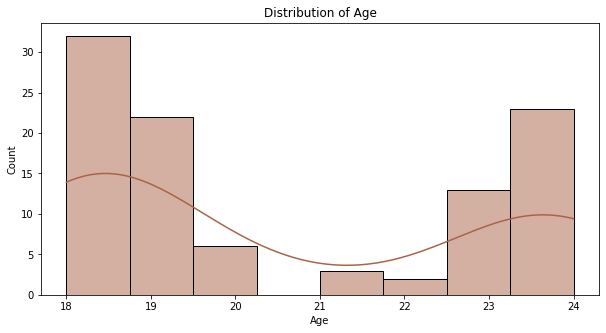

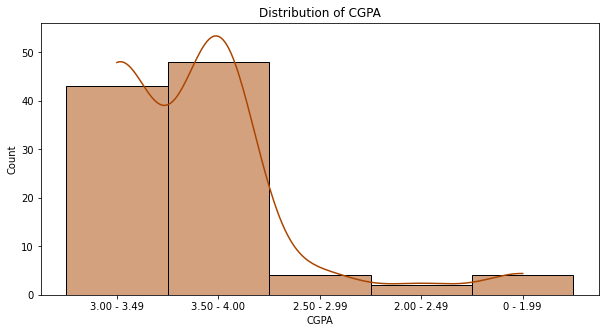

In [40]:
numerical_variables = ['Age', 'CGPA']
colors = ['#AA6347', '#AA4500']

for column, color in zip(numerical_variables, colors):
    plt.figure(figsize=(10, 5))
    sns.histplot(data=df, x = column, kde=True, color = color)
    plt.title(f'Distribution of {column}')
    plt.show()
    


Majority of the students fall in the age range 18-19 and 23-24.This distribution account for the fact that most of the students are in the first year. Most of the students have excellent performance, reasons why the majority of students fall in the CGPA ranges of 3.0 - 3.49 and 3.5 - 4.00.



In [41]:
df['Depression'].value_counts()

Not depressed    66
Depressed        35
Name: Depression, dtype: int64

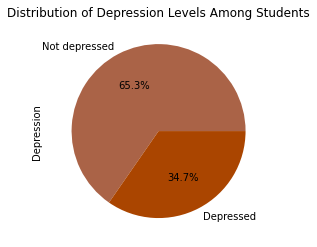

In [42]:
df['Depression'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['#AA6347', '#AA4500'])

plt.title('Distribution of Depression Levels Among Students')
plt.show()

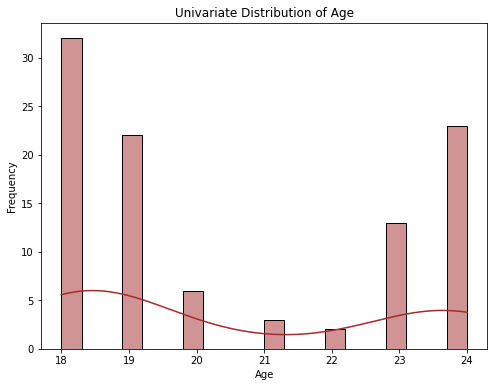

<Figure size 864x720 with 0 Axes>

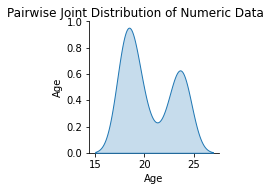

In [43]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your dataset is named 'df'

# Selecting numeric columns
numeric_columns = df.select_dtypes(include='number').columns

# Plot univariate distribution for each numeric column
for column in numeric_columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(df[column], kde=True, color='brown', bins=20)  # Histogram with kernel density estimation
    plt.title(f'Univariate Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

# Plot pairwise joint distribution for all numeric columns
plt.figure(figsize=(12, 10))
sns.pairplot(df[numeric_columns], kind='scatter', diag_kind='kde', palette='husl')
plt.suptitle('Pairwise Joint Distribution of Numeric Data', y=1.02)
plt.show()


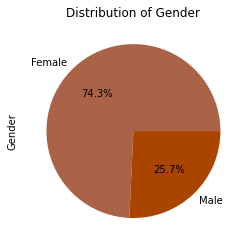

In [44]:
df['Gender'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['#AA6347', '#AA4500'])
plt.title('Distribution of Gender')
plt.show()

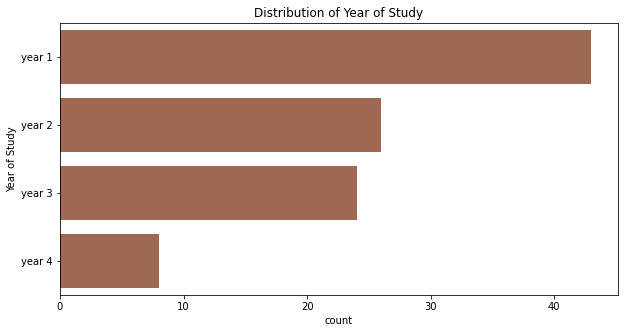

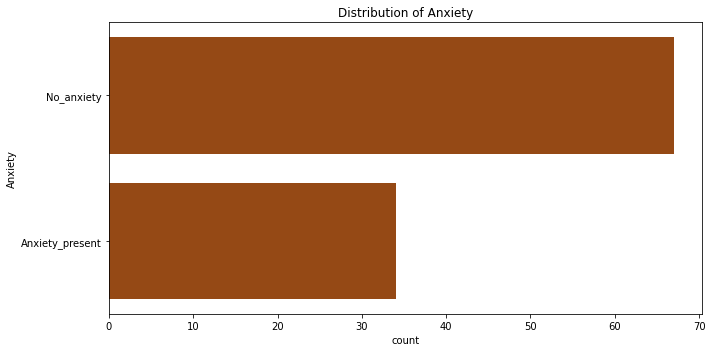

In [45]:
categorical_variables = [ 'Year of Study', 'Anxiety']
colors = ['#AA6347', '#AA4500']

for column, color in zip(categorical_variables, colors):
    plt.figure(figsize=(10, 5))
    sns.countplot(data=df, y=column, color=color)
    plt.title(f'Distribution of {column}')
plt.tight_layout()
plt.show()


# Dominant Age Group: Year 1 (18-19)

Majority of the students are in the first year. this could be one of the reasons why the dominant age group is 18 and 19. For the count of students with anxiety a considerable count(30 and above) for students expiriencing anxiety and 60% and above are not experiencing anxiety.

Also relevant to my research:

* Students in 18-19 age group: closer to high school student age (brain development still occuring)
* **New Students**: signicant because perhaps newer students have higher correlation to depression



In [46]:
len(df['Course'].unique())

36

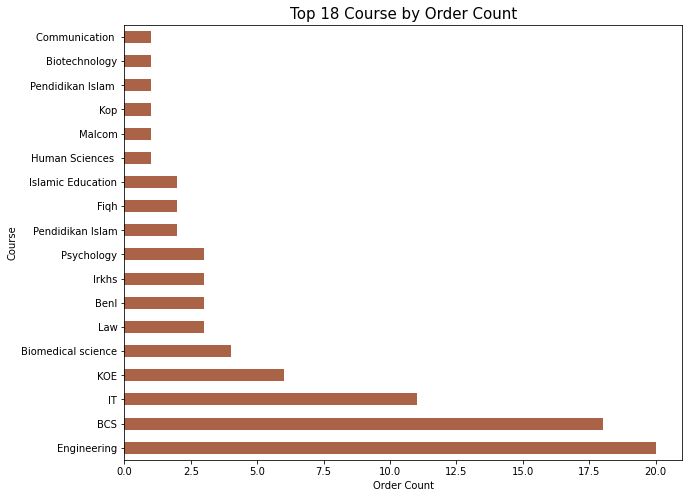

In [47]:
plt.figure(figsize=(10, 8))
df.Course.value_counts().iloc[:18].plot(kind='barh',color= '#AA6347')
plt.title('Top 18 Course by Order Count', fontsize=15)
plt.xlabel('Order Count')
plt.ylabel('Course')
plt.show()

# Engineering most common Course

The majority of students take Stem related classes. **Engineering** and BCS are the top 2 most common courses taken by students in this data set.

All Depressed Students:
35

In [48]:
depression_df = df[df.Depression == 'Depressed']
depression_df

,Timestamp,Gender,Age,Course,Year of Study,CGPA,Marital status,Depression,Anxiety,Panic attack,Treatment
0,8/7/2020 12:02,Female,18,Engineering,year 1,3.00 - 3.49,Not_married,Depressed,No_anxiety,Panic attack,No_treatment
2,8/7/2020 12:05,Male,19,IT,year 1,3.00 - 3.49,Not_married,Depressed,Anxiety_present,Panic attack,No_treatment
3,8/7/2020 12:06,Female,22,Law,year 3,3.00 - 3.49,Married,Depressed,No_anxiety,No panic_attack,No_treatment
6,8/7/2020 12:32,Female,23,Pendidikan Islam,year 2,3.50 - 4.00,Married,Depressed,No_anxiety,Panic attack,No_treatment
11,8/7/2020 12:39,Female,24,Engineering,year 3,3.50 - 4.00,Married,Depressed,No_anxiety,No panic_attack,No_treatment
12,8/7/2020 12:40,Female,18,BCS,year 1,3.00 - 3.49,Not_married,Depressed,No_anxiety,No panic_attack,No_treatment
17,8/7/2020 12:52,Female,24,ENM,year 4,3.00 - 3.49,Married,Depressed,Anxiety_present,Panic attack,No_treatment
19,8/7/2020 13:07,Female,18,Marine science,year 2,3.50 - 4.00,Married,Depressed,Anxiety_present,Panic attack,No_treatment
24,8/7/2020 13:17,Female,23,BCS,year 3,3.50 - 4.00,Not_married,Depressed,Anxiety_present,Panic attack,No_treatment
27,8/7/2020 13:41,Male,18,Engineering,year 2,3.00 - 3.49,Married,Depressed,Anxiety_present,No panic_attack,No_treatment


In [49]:
depression_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35 entries, 0 to 98
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Timestamp       35 non-null     object
 1   Gender          35 non-null     object
 2   Age             35 non-null     int64 
 3   Course          35 non-null     object
 4   Year of Study   35 non-null     object
 5   CGPA            35 non-null     object
 6   Marital status  35 non-null     object
 7   Depression      35 non-null     object
 8   Anxiety         35 non-null     object
 9   Panic attack    35 non-null     object
 10  Treatment       35 non-null     object
dtypes: int64(1), object(10)
memory usage: 3.3+ KB


In [50]:
depression_df.Gender.value_counts(normalize=True)

Female    0.828571
Male      0.171429
Name: Gender, dtype: float64

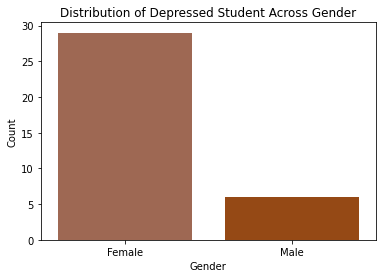

In [51]:
colors = ['#AA6347', '#AA4500']

plt.figure(figsize=(6, 4))
sns.countplot(data=depression_df, x='Gender', palette=colors)
plt.title('Distribution of Depressed Student Across Gender', fontsize=12)
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

# Gender & Depression Conclusion: More **female students** are depressed than males.

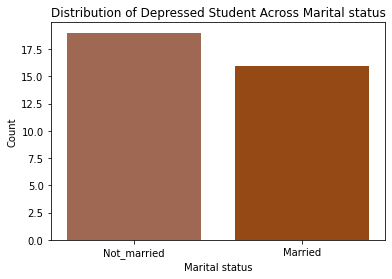

In [52]:
colors = ['#AA6347', '#AA4500']

plt.figure(figsize=(6, 4))
sns.countplot(data=depression_df, x='Marital status', palette=colors)
plt.title('Distribution of Depressed Student Across Marital status', fontsize=12)
plt.xlabel('Marital status')
plt.ylabel('Count')
plt.show()

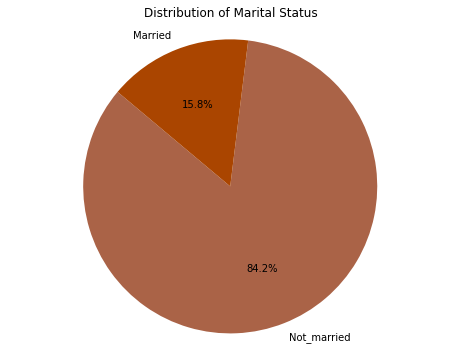

In [53]:
marital_status_counts = df['Marital status'].value_counts()

# Define colors
colors = ['#AA6347', '#AA4500']

# Plotting the distribution using a pie chart with custom colors
plt.figure(figsize=(8, 6))  # Adjust the figure size if needed
plt.pie(marital_status_counts, labels=marital_status_counts.index, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Distribution of Marital Status')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()

Conclusion: 
No apparent correlation between marital status and depression amongst students. However the  increased prevalence of depression in non-married couples is slightly revealing of the emotional fortitude and stability that married couples share. The exeriences of married inidividuals gathered in matrimony typically makes them more stable. 

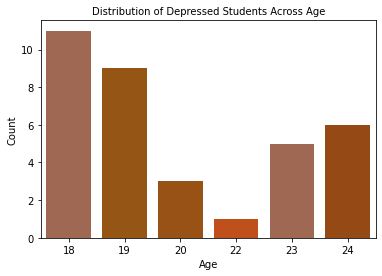

In [54]:
colors = ['#AA6347', '#AA5500', '#AF5000', '#DA4500', '#AA6347', '#AA4500']

plt.figure(figsize=(6, 4))
sns.countplot(data=depression_df, x='Age', palette=colors)
plt.title('Distribution of Depressed Students Across Age', fontsize=10)
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()


Across student age the proportion of students who are depressed falls with age 18 and 19. At 20 to 22 the proportion of depressed students decrease. There is also a noticeable increase in the number of depressed studnt form Age 24.



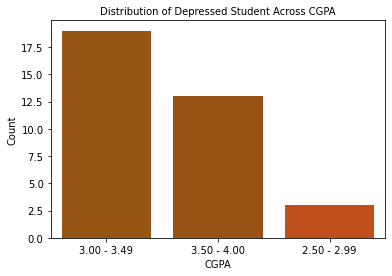

In [55]:
colors = ['#AA5500', '#AF5000', '#DA4500']
plt.figure(figsize=(6, 4))
sns.countplot(data=depression_df, x='CGPA', palette=colors)
plt.title('Distribution of Depressed Student Across CGPA', fontsize=10)
plt.xlabel('CGPA')
plt.ylabel('Count')
plt.show()

There are more depressed students with CGPA OF 3.00 - 3.49, followed by students with CGPA of 3.50 - 4.00. Only a few proportion of student with CGPA OF 2.50 - 2.99 are depressed.

We are working with smarter students.



In [56]:
depression_df.columns

Index(['Timestamp', 'Gender', 'Age', 'Course', 'Year of Study', 'CGPA',
       'Marital status', 'Depression', 'Anxiety', 'Panic attack', 'Treatment'],
      dtype='object')

Check for Null

Panic Attack coount distribution

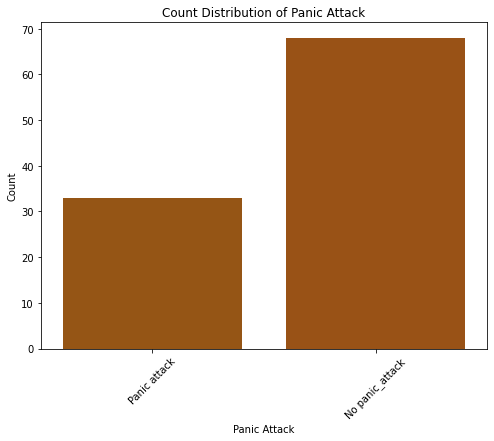

In [57]:

def plot_count_distribution_panic_attack(data):
    plt.figure(figsize=(8, 6))  
    sns.countplot(data['Panic attack'], palette=['#AA5500', '#AF5000'])
    plt.title('Count Distribution of Panic Attack')
    plt.xlabel('Panic Attack')
    plt.ylabel('Count')
    plt.xticks(rotation=45) 
    plt.show()

# Assuming your dataset is named 'df'
# Plot count distribution of categorical data for panic attack
plot_count_distribution_panic_attack(df)

<Figure size 576x360 with 0 Axes>

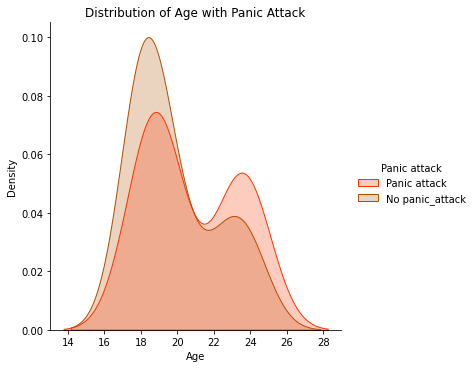

In [58]:
colors = colors = {'Panic attack': '#FA3500', 'No panic_attack': '#AF5000'}

plt.figure(figsize=(8, 5))
sns.displot(data=depression_df, x='Age', hue='Panic attack', palette=colors, kind='kde', fill=True)
plt.title('Distribution of Age with Panic Attack', fontsize=12)
plt.xlabel('Age')
plt.ylabel('Density')
plt.show()

The kernel density plot indicate that there are variations in the distribution of ages between students with panick and no panick attack. Furthermore, students within the age of 18 and above without panick attack are more likely to be depressed relative to a student with a panick attack.



Treatment Count Distribution

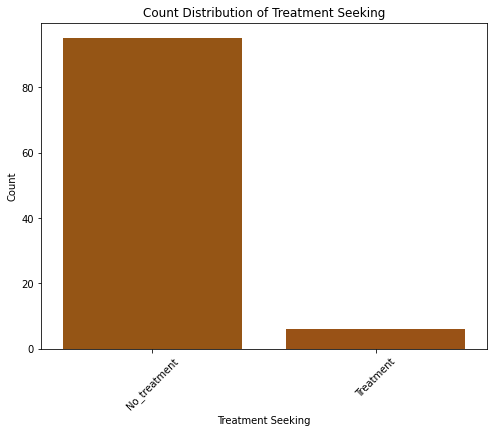

In [59]:

def plot_count_distribution_treatment(data):
    plt.figure(figsize=(8, 6))  
    sns.countplot(data['Treatment'], palette=['#AA5500', '#AF5000'])
    plt.title('Count Distribution of Treatment Seeking')
    plt.xlabel('Treatment Seeking')
    plt.ylabel('Count')
    plt.xticks(rotation=45) 
    plt.show()

# Assuming your dataset is named 'df'
# Plot count distribution of categorical data for treatment seeking
plot_count_distribution_treatment(df)

In [60]:
ages = df['Age']
# Set display options to show all rows and columns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Now display your DataFrame
print(df)
print(ages)

               Timestamp  Gender  Age                   Course Year of Study  \
0         8/7/2020 12:02  Female   18              Engineering        year 1   
1         8/7/2020 12:04    Male   21        Islamic Education        year 2   
2         8/7/2020 12:05    Male   19                       IT        year 1   
3         8/7/2020 12:06  Female   22                      Law        year 3   
4         8/7/2020 12:13    Male   23             Mathemathics        year 4   
5         8/7/2020 12:31    Male   19              Engineering        year 2   
6         8/7/2020 12:32  Female   23         Pendidikan Islam        year 2   
7         8/7/2020 12:33  Female   18                      BCS        year 1   
8         8/7/2020 12:35  Female   19          Human Resources        year 2   
9         8/7/2020 12:39    Male   18                    Irkhs        year 1   
10        8/7/2020 12:39  Female   20               Psychology        year 1   
11        8/7/2020 12:39  Female   24   

In [61]:
df

,Timestamp,Gender,Age,Course,Year of Study,CGPA,Marital status,Depression,Anxiety,Panic attack,Treatment
0,8/7/2020 12:02,Female,18,Engineering,year 1,3.00 - 3.49,Not_married,Depressed,No_anxiety,Panic attack,No_treatment
1,8/7/2020 12:04,Male,21,Islamic Education,year 2,3.00 - 3.49,Not_married,Not depressed,Anxiety_present,No panic_attack,No_treatment
2,8/7/2020 12:05,Male,19,IT,year 1,3.00 - 3.49,Not_married,Depressed,Anxiety_present,Panic attack,No_treatment
3,8/7/2020 12:06,Female,22,Law,year 3,3.00 - 3.49,Married,Depressed,No_anxiety,No panic_attack,No_treatment
4,8/7/2020 12:13,Male,23,Mathemathics,year 4,3.00 - 3.49,Not_married,Not depressed,No_anxiety,No panic_attack,No_treatment
5,8/7/2020 12:31,Male,19,Engineering,year 2,3.50 - 4.00,Not_married,Not depressed,No_anxiety,Panic attack,No_treatment
6,8/7/2020 12:32,Female,23,Pendidikan Islam,year 2,3.50 - 4.00,Married,Depressed,No_anxiety,Panic attack,No_treatment
7,8/7/2020 12:33,Female,18,BCS,year 1,3.50 - 4.00,Not_married,Not depressed,Anxiety_present,No panic_attack,No_treatment
8,8/7/2020 12:35,Female,19,Human Resources,year 2,2.50 - 2.99,Not_married,Not depressed,No_anxiety,No panic_attack,No_treatment
9,8/7/2020 12:39,Male,18,Irkhs,year 1,3.50 - 4.00,Not_married,Not depressed,Anxiety_present,Panic attack,No_treatment


# ANALYZE TIME SERIES of Numeric Data (only age)


In [62]:
df.Age

0      18
1      21
2      19
3      22
4      23
5      19
6      23
7      18
8      19
9      18
10     20
11     24
12     18
13     19
14     18
15     24
16     24
17     24
18     20
19     18
20     19
21     18
22     24
23     24
24     23
25     18
26     19
27     18
28     24
29     24
30     23
31     18
32     19
33     18
34     19
35     18
36     18
37     19
38     18
39     24
40     24
41     22
42     20
43     19
44     23
45     18
46     19
47     18
48     24
49     24
50     23
51     18
52     19
53     20
54     19
55     21
56     23
57     20
58     18
59     23
60     18
61     19
62     18
63     24
64     24
65     23
66     18
67     19
68     18
69     24
70     24
71     18
72     19
73     18
74     24
75     24
76     23
77     18
78     19
79     18
80     24
81     24
82     19
83     19
84     23
85     18
86     19
87     18
88     24
89     24
90     23
91     18
92     19
93     18
94     24
95     18
96     21
97     18
98     19
99     23


In [63]:
df.columns

Index(['Timestamp', 'Gender', 'Age', 'Course', 'Year of Study', 'CGPA',
       'Marital status', 'Depression', 'Anxiety', 'Panic attack', 'Treatment'],
      dtype='object')

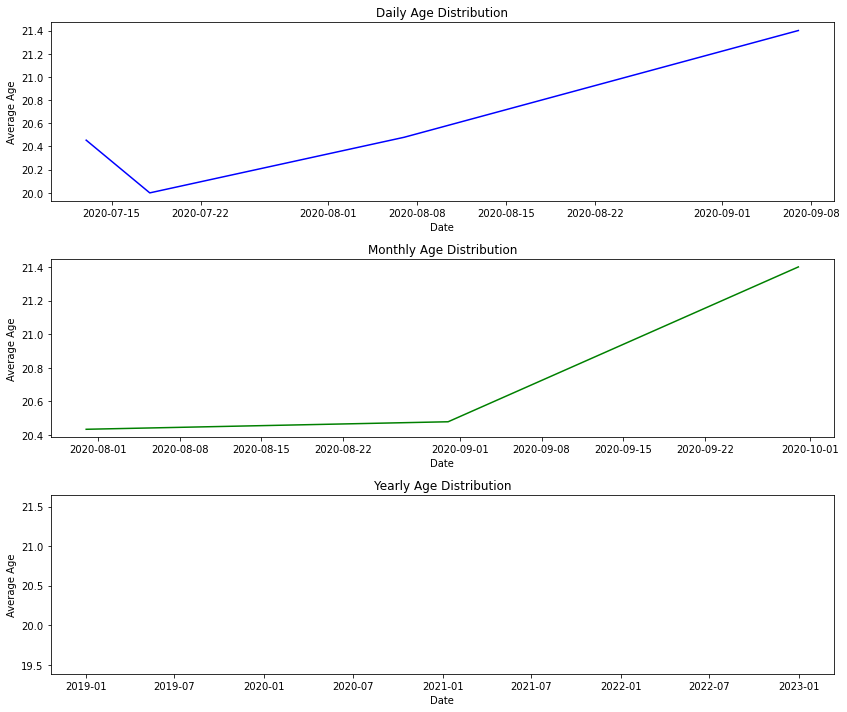

In [64]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your DataFrame is named 'df' and the timestamp column is named 'Timestamp'
# Convert 'Timestamp' column to datetime if it's not already in datetime format
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

# Set 'Timestamp' column as the index
df.set_index('Timestamp', inplace=True)

# Resample the 'Age' data for daily, monthly, and yearly frequencies
daily_age = df['Age'].resample('D').mean()  # Using mean as an example aggregation function
monthly_age = df['Age'].resample('M').mean()  # Using mean as an example aggregation function
yearly_age = df['Age'].resample('Y').mean()  # Using mean as an example aggregation function

# Plotting
plt.figure(figsize=(12, 10))

# Daily frequency
plt.subplot(3, 1, 1)
sns.lineplot(data=daily_age, color='blue')
plt.title('Daily Age Distribution')
plt.xlabel('Date')
plt.ylabel('Average Age')

# Monthly frequency
plt.subplot(3, 1, 2)
sns.lineplot(data=monthly_age, color='green')
plt.title('Monthly Age Distribution')
plt.xlabel('Date')
plt.ylabel('Average Age')

# Yearly frequency
plt.subplot(3, 1, 3)
sns.lineplot(data=yearly_age, color='red')
plt.title('Yearly Age Distribution')
plt.xlabel('Date')
plt.ylabel('Average Age')

plt.tight_layout()
plt.show()

In [65]:
print("Daily Age:\n", daily_age)
print("\nMonthly Age:\n", monthly_age)
print("\nYearly Age:\n", yearly_age)

Daily Age:
 Timestamp
2020-07-13    20.454545
2020-07-14          NaN
2020-07-15          NaN
2020-07-16          NaN
2020-07-17          NaN
2020-07-18    20.000000
2020-07-19          NaN
2020-07-20          NaN
2020-07-21          NaN
2020-07-22          NaN
2020-07-23          NaN
2020-07-24          NaN
2020-07-25          NaN
2020-07-26          NaN
2020-07-27          NaN
2020-07-28          NaN
2020-07-29          NaN
2020-07-30          NaN
2020-07-31          NaN
2020-08-01          NaN
2020-08-02          NaN
2020-08-03          NaN
2020-08-04          NaN
2020-08-05          NaN
2020-08-06          NaN
2020-08-07    20.479452
2020-08-08          NaN
2020-08-09          NaN
2020-08-10          NaN
2020-08-11          NaN
2020-08-12          NaN
2020-08-13          NaN
2020-08-14          NaN
2020-08-15          NaN
2020-08-16          NaN
2020-08-17          NaN
2020-08-18          NaN
2020-08-19          NaN
2020-08-20          NaN
2020-08-21          NaN
2020-08-22        

In [66]:
# Assuming your dataset is named 'df'
# Check for null or missing values in the dataset
null_entries = df[df.isnull().any(axis=1)]

# Display the entries with null values
print("Entries with null values:")
print(null_entries)

Entries with null values:
Empty DataFrame
Columns: [Gender, Age, Course, Year of Study, CGPA, Marital status, Depression, Anxiety, Panic attack, Treatment]
Index: []


Check for Duplicates

In [67]:
# Check for duplicate entries in the dataset
duplicate_entries = df[df.duplicated()]

# Display the duplicate entries
print("Duplicate entries:")
print(duplicate_entries)

Duplicate entries:
                     Gender  Age       Course Year of Study         CGPA  \
Timestamp                                                                  
2020-07-13 10:10:30  Female   18  Engineering        year 4  3.50 - 4.00   

                    Marital status     Depression     Anxiety  \
Timestamp                                                       
2020-07-13 10:10:30    Not_married  Not depressed  No_anxiety   

                        Panic attack     Treatment  
Timestamp                                           
2020-07-13 10:10:30  No panic_attack  No_treatment  


In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 101 entries, 2020-08-07 12:02:00 to 2020-07-18 20:16:21
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Gender          101 non-null    object
 1   Age             101 non-null    int64 
 2   Course          101 non-null    object
 3   Year of Study   101 non-null    object
 4   CGPA            101 non-null    object
 5   Marital status  101 non-null    object
 6   Depression      101 non-null    object
 7   Anxiety         101 non-null    object
 8   Panic attack    101 non-null    object
 9   Treatment       101 non-null    object
dtypes: int64(1), object(9)
memory usage: 8.7+ KB


In [69]:
df.isna().sum()

Gender            0
Age               0
Course            0
Year of Study     0
CGPA              0
Marital status    0
Depression        0
Anxiety           0
Panic attack      0
Treatment         0
dtype: int64

In [70]:
df.describe()


,Age
count,101.000000
mean,20.514851
std,2.488429
min,18.000000
25%,18.000000
50%,19.000000
75%,23.000000
max,24.000000


Plot: Univariate Distribution of Age


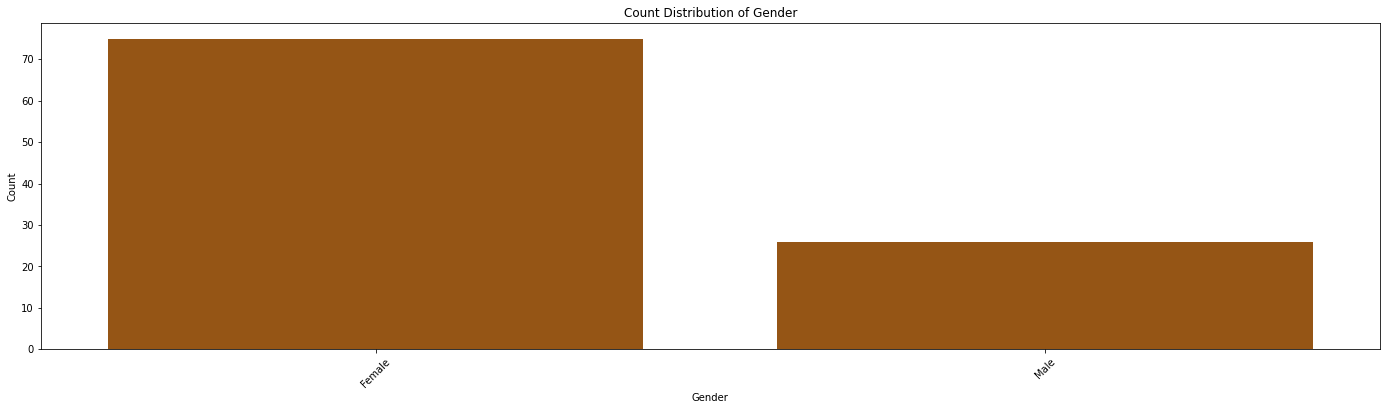

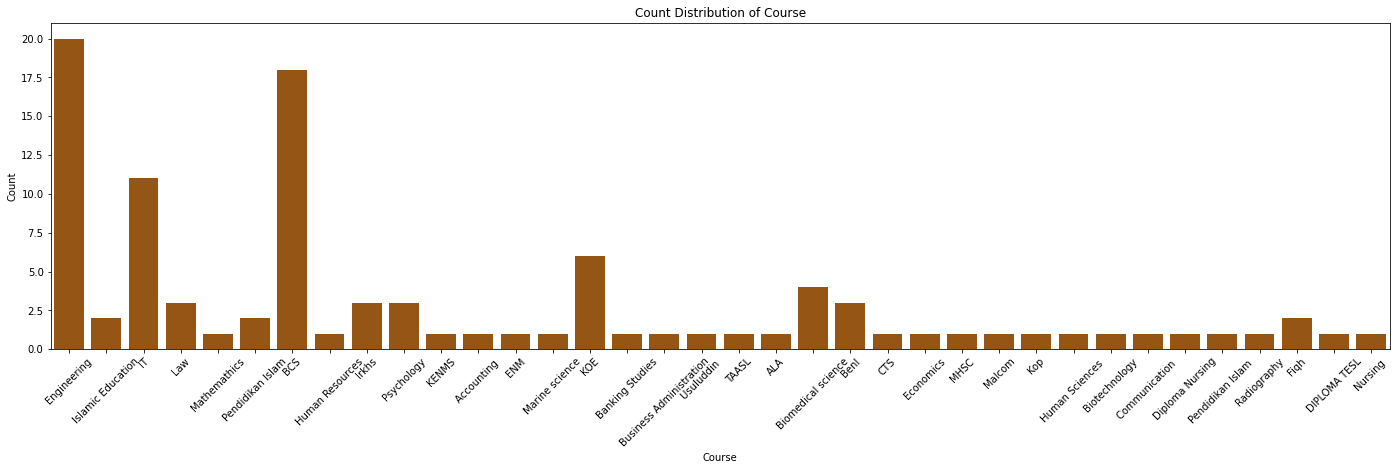

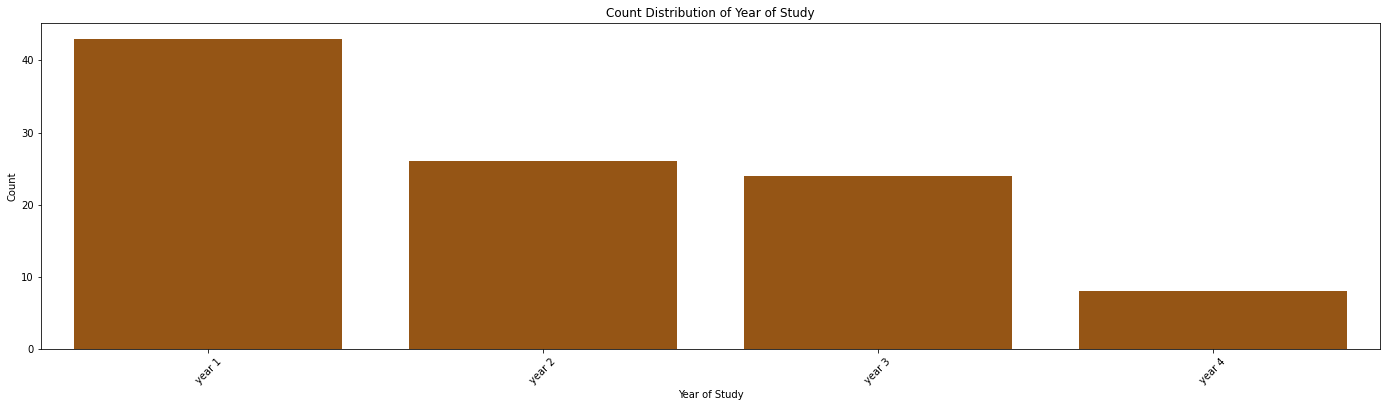

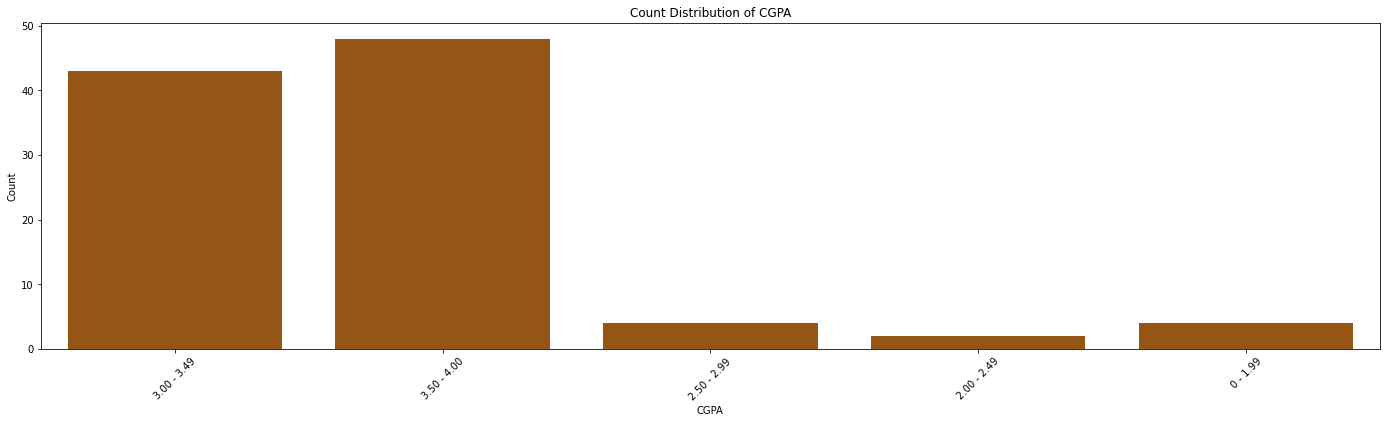

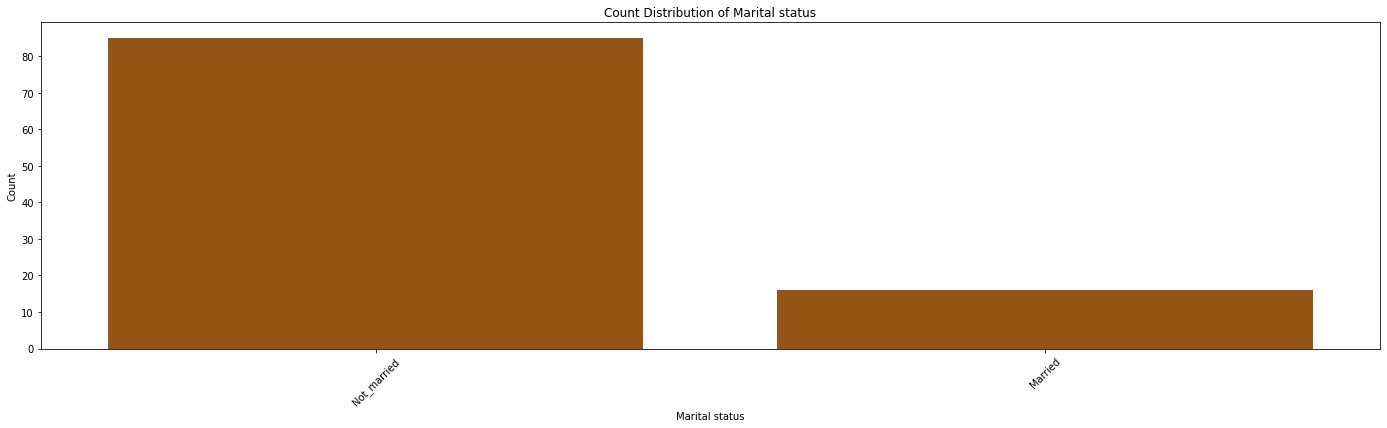

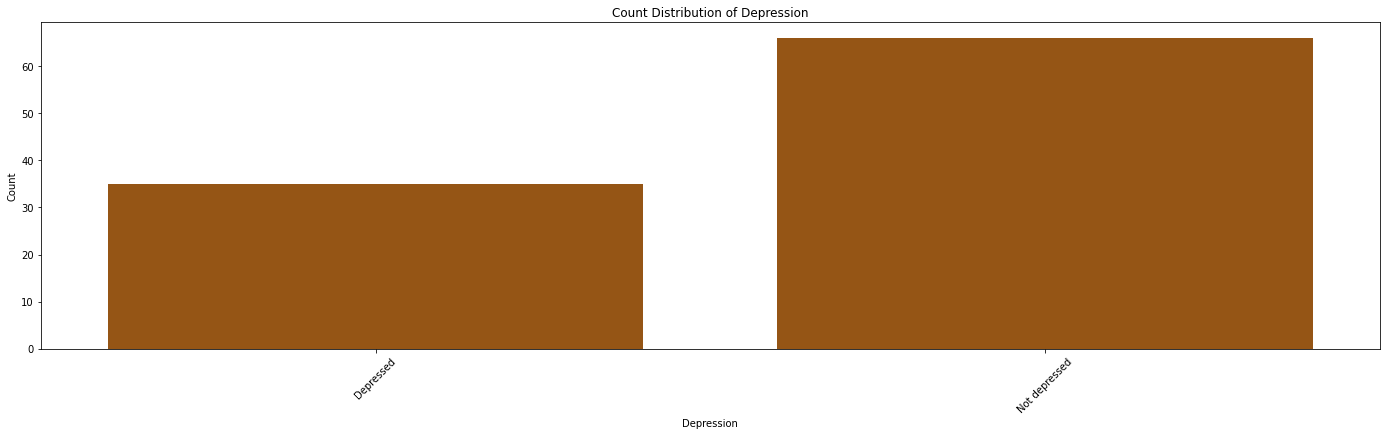

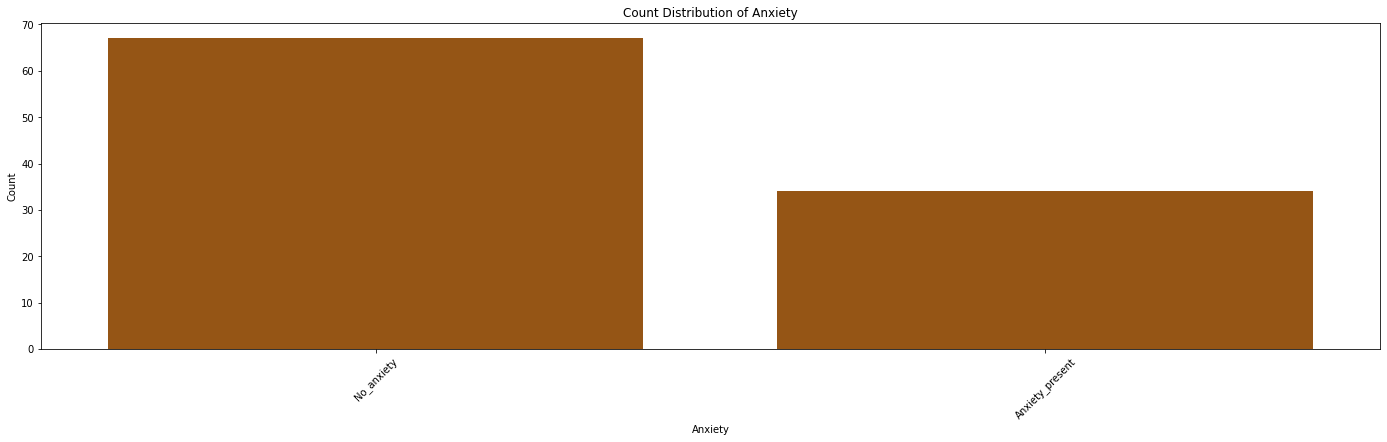

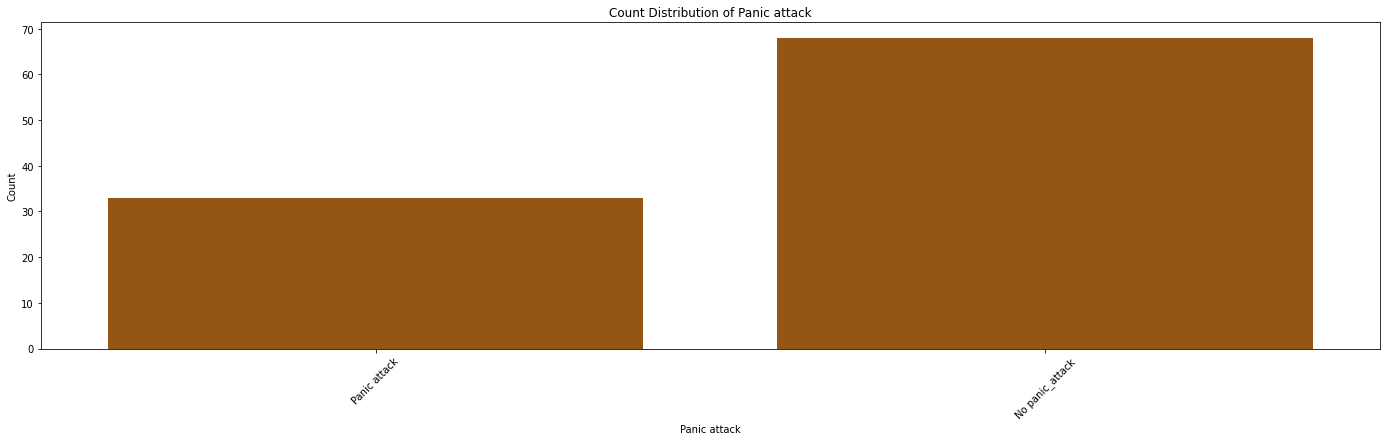

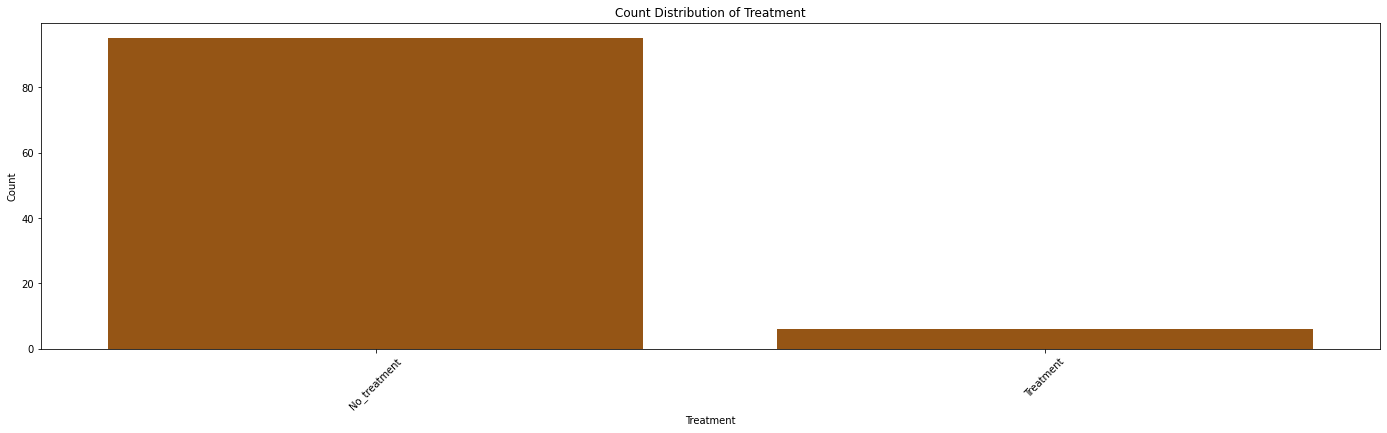

In [71]:

def plot_count_distribution(data):
    for column in data.select_dtypes(include='object').columns:
        plt.figure(figsize=(24, 6))  # Increase width of the figure
        sns.countplot(data[column], color='#AA5500')  # Set the color here
        plt.title(f'Count Distribution of {column}')
        plt.xlabel(column)
        plt.ylabel('Count')
        plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
        plt.show()

# Assuming your dataset is named 'df'
# Plot count distribution of categorical data
plot_count_distribution(df)

Plot Count Distribution for Categorical Data

MAKE GRAPHS WIDER

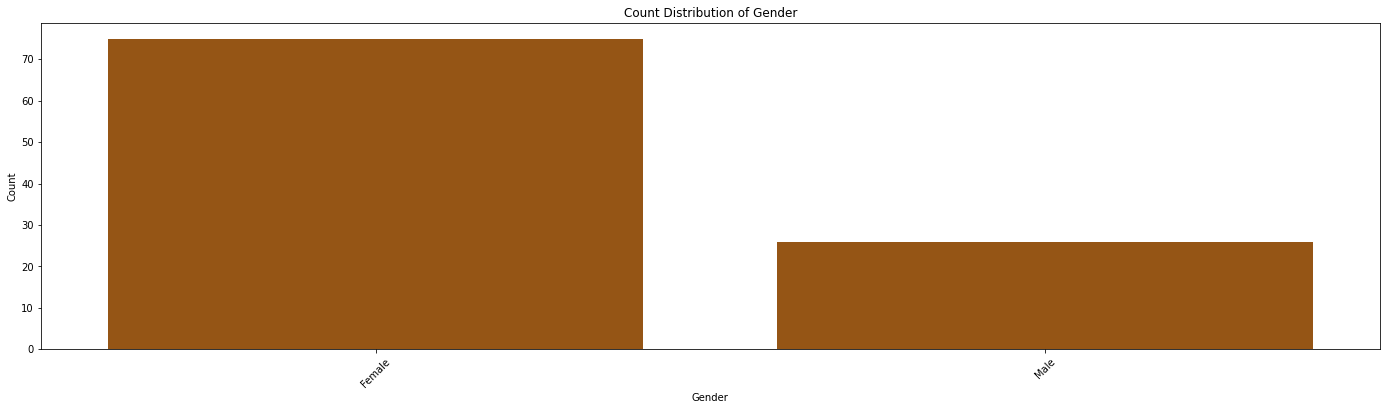

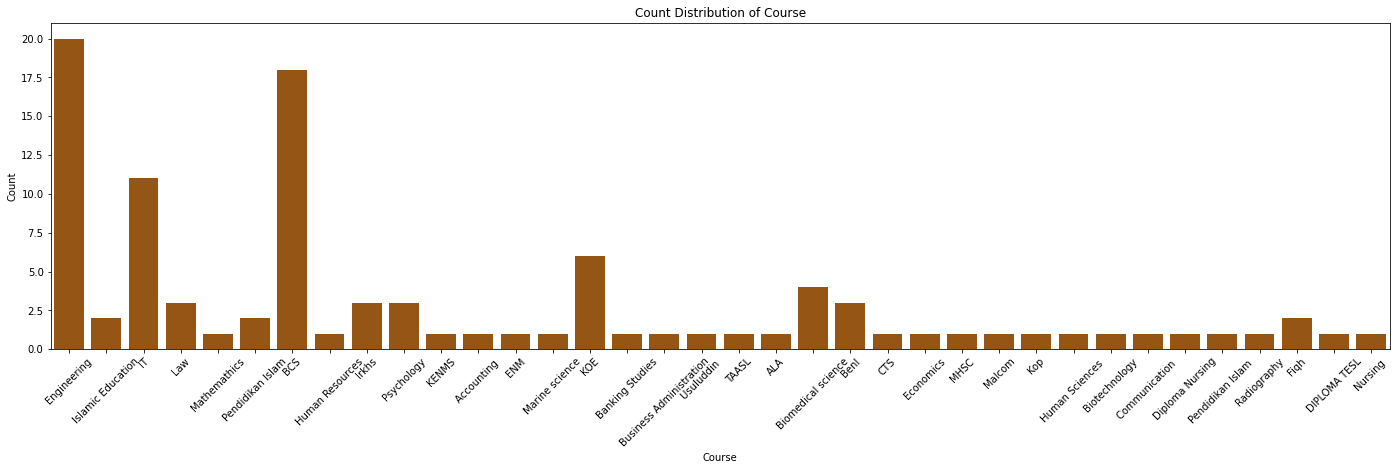

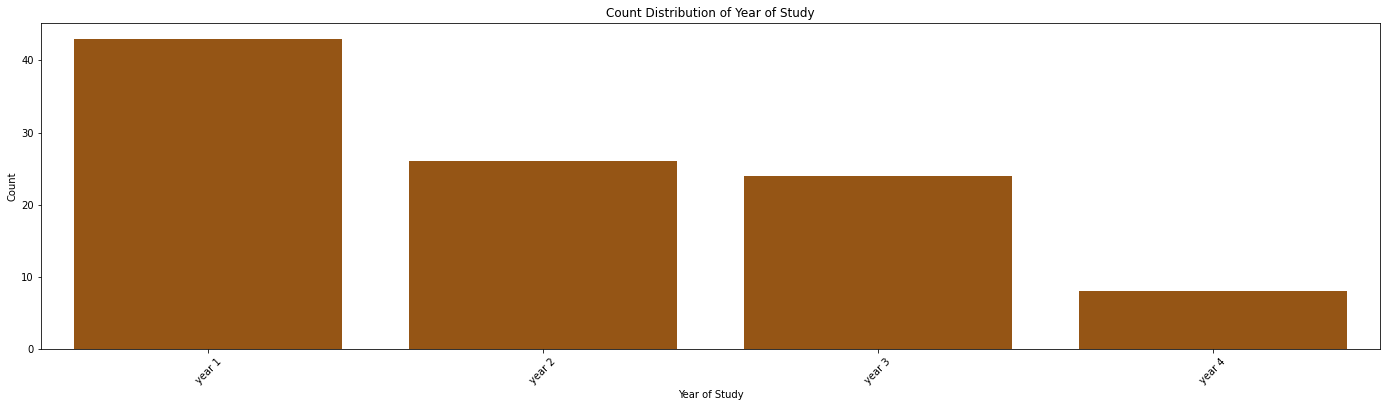

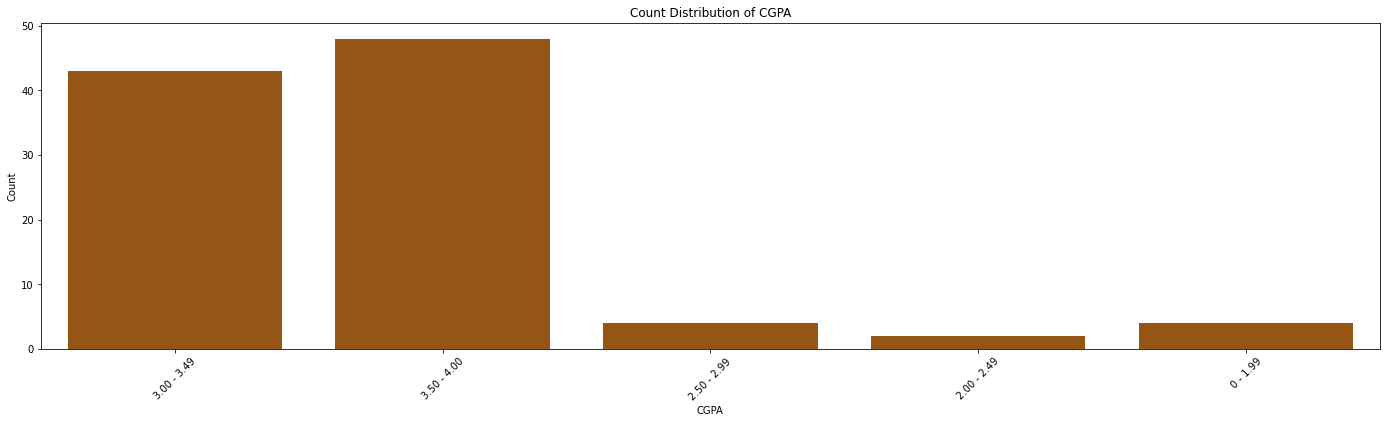

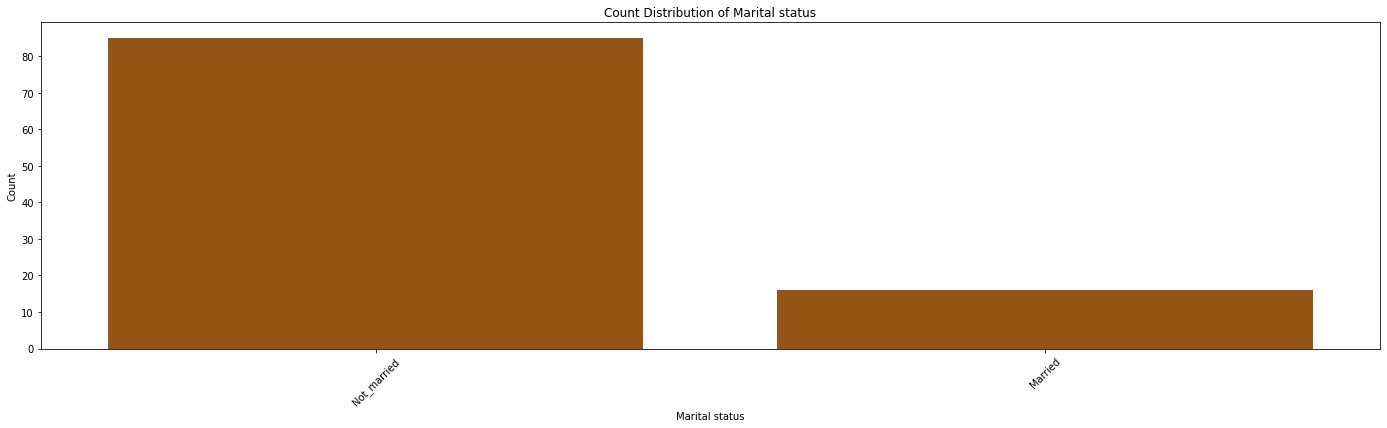

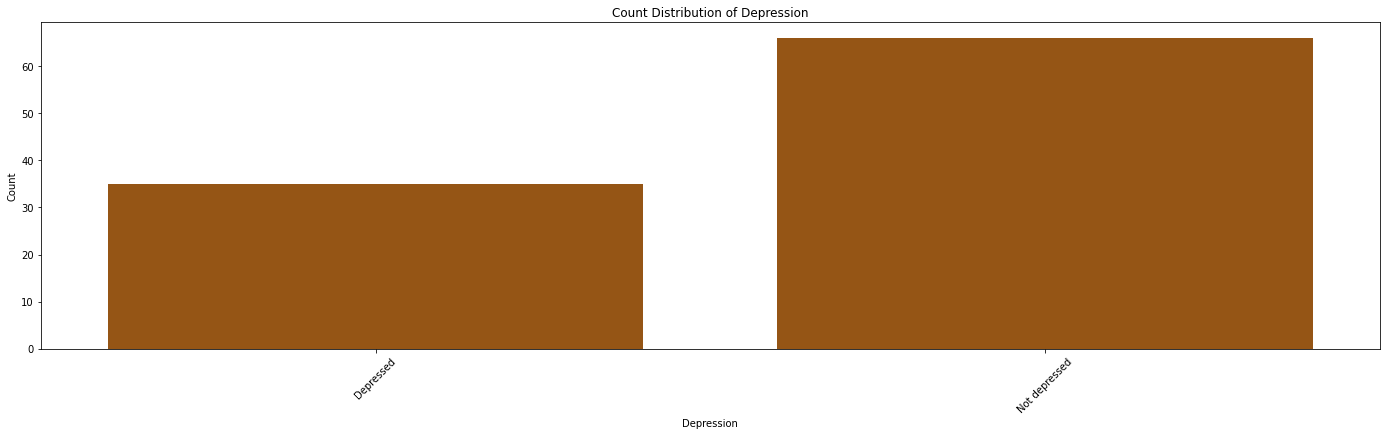

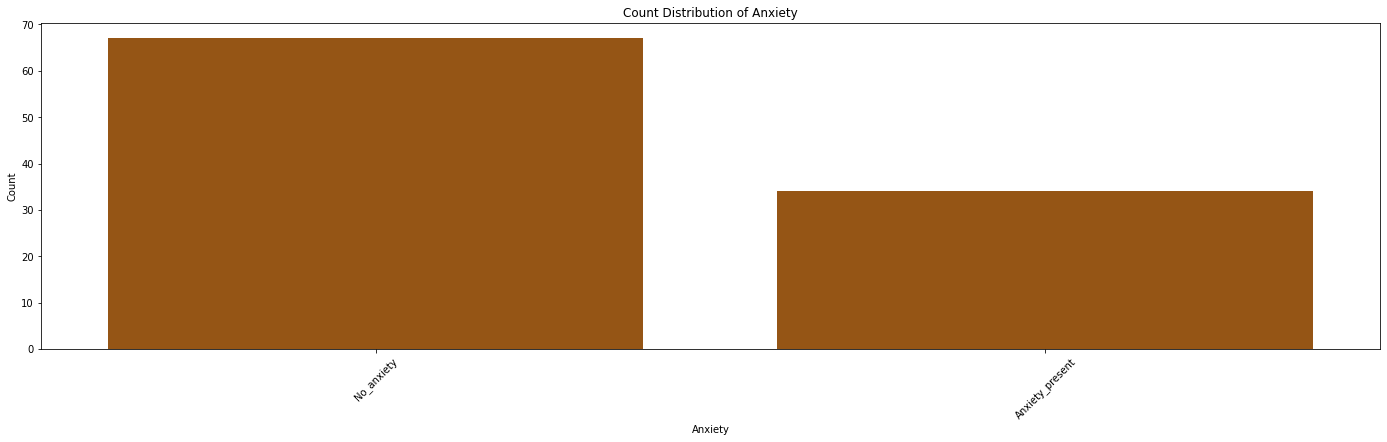

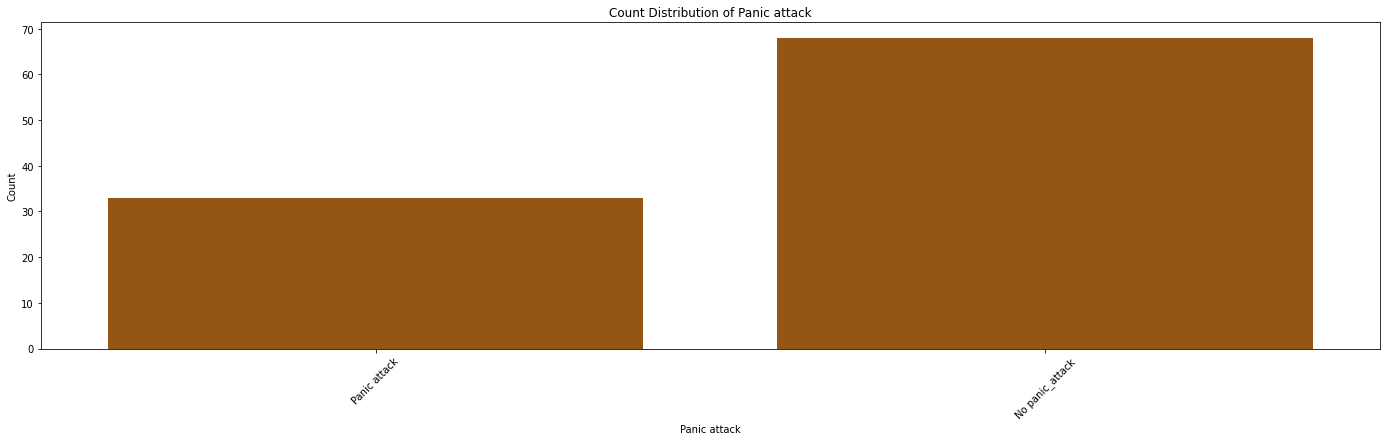

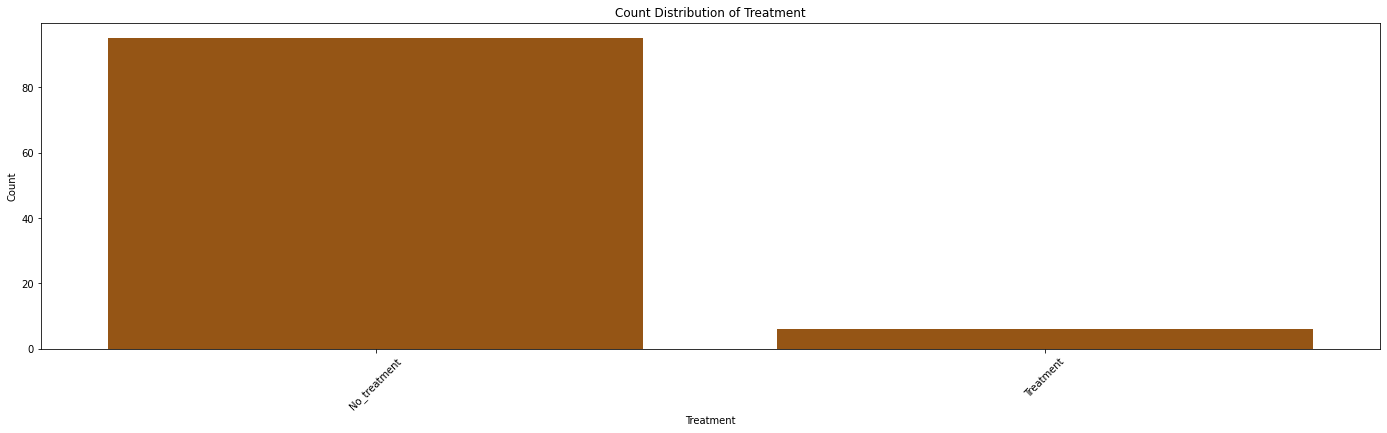

In [72]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_count_distribution(data):
    for column in data.select_dtypes(include='object').columns:
        plt.figure(figsize=(24, 6))  # Increase width of the figure
        sns.countplot(data[column], color='#AA5500')  # Set the color here
        plt.title(f'Count Distribution of {column}')
        plt.xlabel(column)
        plt.ylabel('Count')
        plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
        plt.show()

# Assuming your dataset is named 'df'
# Plot count distribution of categorical data
plot_count_distribution(df)
